# **Proyecto: Predicción de la Calidad del Agua Dulce**

## **Fase 1: Comprensión del Negocio y los Datos**

(ME FALTA AGREGAR MAS EN LA COMPRENSION DEL NEGOCIO Y LOS DATOS)
### 1.1. Objetivo del Proyecto
El objetivo principal es construir un modelo de machine learning, específicamente una Red Neuronal Artificial (MLP Classifier), para predecir la calidad del agua dulce. La calidad se clasifica en tres categorías (`0`, `1`, `2`), lo que define esto como un problema de **clasificación multiclase**. Un modelo preciso podría ser una herramienta valiosa para agencias ambientales y autoridades de salud pública.



### 1.2. Carga de Datos y Verificación Inicial
En este paso, importamos las librerías necesarias, descargamos el dataset desde Kaggle Hub y lo cargamos en un DataFrame de Pandas. Realizamos una verificación inicial para asegurar que los datos se cargaron correctamente.

In [ ]:
# --- Configuración del Entorno ---
# Instalar la librería de Kaggle Hub (el -q lo hace silencioso)
!pip install kagglehub -q

# Importar librerías
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración de estilo para los gráficos
sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = (12, 7)
print("Librerías importadas y configuración aplicada.")

# --- Carga de Datos ---
print("\nDescargando el dataset...")
path = kagglehub.dataset_download("naiborhujosua/predict-the-quality-of-freshwater")
actual_filename = os.listdir(path)[0]
csv_file_path = os.path.join(path, actual_filename)

# Cargar el dataset en un DataFrame
df = pd.read_csv(csv_file_path)
print("Dataset cargado exitosamente.")

# --- Verificación Inicial ---
print("\n--- Primeras 5 filas del dataset ---")
display(df.head())

Librerías importadas y configuración aplicada.


### 1.3. Análisis Detallado de la Estructura del Dataset

Ahora que vemos todas las columnas, necesitamos entender el tipo de dato de cada una y, lo más importante, la cantidad de valores nulos. Esto es fundamental para planificar la limpieza y el preprocesamiento.

In [ ]:
# Cargar el dataset en un DataFrame
try:
    df = pd.read_csv(csv_file_path)
    print("Dataset cargado exitosamente.")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta '{csv_file_path}'. Verifica la extracción.")

# 1. Vistazo a las primeras y últimas filas
print("\n--- Primeras 5 filas ---")
display(df.head())
print("\n--- Últimas 5 filas ---")
display(df.tail())

# 2. Resumen conciso del DataFrame (tipos de datos, memoria, nulos)
print("\n--- Información General del DataFrame ---")
df.info()

# 3. Dimensiones del dataset (filas, columnas)
print(f"\nEl dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

# 4. Estadísticas descriptivas para variables numéricas
print("\n--- Estadísticas Descriptivas ---")
display(df.describe().T.style.background_gradient(cmap='Greens'))

Dataset cargado exitosamente.

--- Primeras 5 filas ---


,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.269945e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0



--- Últimas 5 filas ---


,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
5956837,5956837,8.418457,0.000095,8.427576,256.570863,4.751543e-26,4.967504,Faint Yellow,3.824532,0.541850,...,2.630130,9.608234e-03,545.990529,Well,21.436974,70.493951,February,8.0,8.0,1
5956838,5956838,7.950573,0.215729,4.677850,292.727780,4.679421e-12,1.842063,Near Colorless,1.181166,2.747241,...,3.555576,1.875424e-11,514.136530,Ground,19.064632,67.052475,September,8.0,6.0,1
5956839,5956839,8.145572,0.000005,7.112877,254.831175,3.150254e-56,0.656923,Colorless,1.769609,1.398686,...,3.127251,1.199405e+00,336.947289,NaN,5.863636,64.086020,January,16.0,11.0,1
5956840,5956840,8.273548,0.001236,10.182408,122.842038,4.226073e-33,0.903032,Light Yellow,0.366909,3.076229,...,2.762962,2.824411e+00,112.458644,NaN,28.034083,18.158372,March,29.0,13.0,1
5956841,5956841,7.539523,0.022760,4.902591,106.256430,1.399449e-10,1.069694,Light Yellow,0.371766,0.995846,...,6.033203,2.838596e-01,118.556879,Aquifer,6.594036,51.751181,June,9.0,2.0,1



--- Información General del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956842 entries, 0 to 5956841
Data columns (total 24 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Index                   int64  
 1   pH                      float64
 2   Iron                    float64
 3   Nitrate                 float64
 4   Chloride                float64
 5   Lead                    float64
 6   Zinc                    float64
 7   Color                   object 
 8   Turbidity               float64
 9   Fluoride                float64
 10  Copper                  float64
 11  Odor                    float64
 12  Sulfate                 float64
 13  Conductivity            float64
 14  Chlorine                float64
 15  Manganese               float64
 16  Total Dissolved Solids  float64
 17  Source                  object 
 18  Water Temperature       float64
 19  Air Temperature         float64
 20  Month                   o

,count,mean,std,min,25%,50%,75%,max
Index,5956842.000000,2978420.500000,1719592.310448,0.000000,1489210.250000,2978420.500000,4467630.750000,5956841.000000
pH,5840788.000000,7.445373,0.888166,1.057113,6.894328,7.449564,8.014424,12.910719
Iron,5917089.000000,0.127903,0.479991,0.000000,0.000010,0.002250,0.054553,19.353145
Nitrate,5851117.000000,6.169970,3.256667,0.286173,3.973078,5.604051,7.672402,96.390779
Chloride,5781311.000000,184.296981,68.428284,23.639187,138.134087,176.017808,217.981093,1507.309881
Lead,5929933.000000,0.001498,0.032506,0.000000,0.000000,0.000000,0.000000,5.844281
Zinc,5800716.000000,1.550255,1.546368,0.000000,0.414820,1.081818,2.230841,28.368672
Turbidity,5907027.000000,0.521509,0.925881,0.000000,0.038724,0.209768,0.624913,23.715270
Fluoride,5767686.000000,0.964431,0.824787,0.000005,0.374950,0.775179,1.341508,14.646254
Copper,5757440.000000,0.516122,0.596553,0.000000,0.128863,0.347959,0.701010,12.074816


### 1.4. Análisis de la Estructura y Calidad de los Datos
Realizamos un análisis programático para entender la composición del dataset, sus dimensiones, tipos de datos y la presencia de valores faltantes.


In [ ]:
# 1. Dimensiones del dataset
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

# 2. Resumen de tipos de datos y nulos
print("\n--- Información General del DataFrame ---")
df.info()

# 3. Estadísticas descriptivas
print("\n--- Estadísticas Descriptivas ---")
display(df.describe().T.style.background_gradient(cmap='Greens'))

# 4. Conteo específico de valores nulos
print("\n--- Conteo de Valores Nulos por Columna ---")
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

### 1.5. Conclusiones de la Exploración Inicial

Del análisis anterior, extraemos las siguientes conclusiones clave que guiarán nuestro preprocesamiento:

1.  **Tamaño del Dataset:** Con casi 8 millones de filas, estamos trabajando con un volumen de datos considerable. El rendimiento y la eficiencia del código serán importantes.
2.  **Tipos de Datos:** La mayoría de las columnas son numéricas (`float64`, `int64`), lo cual es excelente para un modelo MLP. Sin embargo, las columnas `Color` y `Source` son de tipo `object` (texto) y necesitarán un tratamiento especial (o ser eliminadas).
3.  **Columnas Irrelevantes:** La columna `Index` es redundante y debe ser eliminada.
4.  **Problema Crítico de Nulos:**
    *   La columna `Source` es prácticamente inútil, con más del 95% de sus valores nulos. **Decisión: Eliminarla.**
    *   `Water Temperature` y `Air Temperature` tienen una cantidad significativa de nulos (más de 180,000 cada una). No podemos eliminar esas filas. **Decisión: Requerirán imputación** (por ejemplo, rellenar con la media o la mediana).
5.  **Escala de las Variables:** Las estadísticas descriptivas (`describe()`) muestran que las variables tienen rangos y escalas muy diferentes (ej. `Total Dissolved Solids` llega a miles, mientras que `pH` está en un rango pequeño). Esto confirma la **necesidad de escalar los datos** antes de entrenar la red neuronal.

(ME FALTA VER SI PONER MAS GRAFICAS O MENOS, CAMBIAR LOS COLORES)
(VARIABLES MUY IMPORTANTES EN LA PREDICCION DEL AGUA PARA ANALIZARLAS ETC, COSAS QUE SIRVAN PARA EL MODELADO DE LA RNA)
## Fase 2: Análisis Exploratorio de Datos (AED)

### 2.1 Distribucion de la variable y

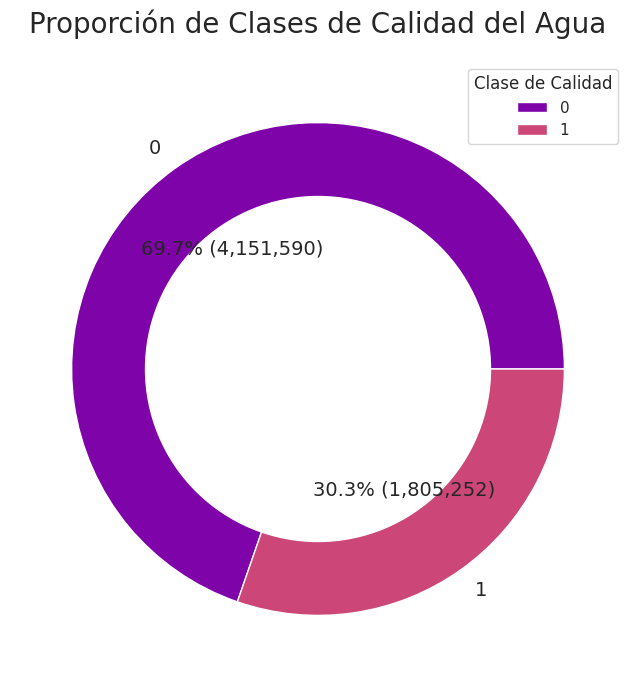

In [ ]:
# --- Gráfico de Pastel para la Variable Target ---

# Contar los valores y los porcentajes
class_counts = df['Target'].value_counts()
class_percentages = df['Target'].value_counts(normalize=True) * 100

# Paleta de colores temática
colors = sns.color_palette("plasma", 3)

# Crear el gráfico de pastel
plt.figure(figsize=(10, 8))
plt.pie(class_counts, labels=class_counts.index, autopct=lambda p: '{:.1f}% ({:,.0f})'.format(p, p * sum(class_counts)/100),
        colors=colors, wedgeprops={'edgecolor': 'white'}, textprops={'fontsize': 14})

# Añadir un círculo en el centro para hacerlo un "donut chart" (más moderno)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Proporción de Clases de Calidad del Agua', fontsize=20, pad=20)
plt.legend(title='Clase de Calidad', labels=class_counts.index, loc='upper right')
plt.show()

### 2.2. Análisis de Variables Numéricas Clave

Vamos a analizar la distribución de algunas de las características más importantes y cómo se relacionan con la calidad del agua (Target).
Estos gráficos nos permiten ver la forma de los datos, identificar sesgos o valores atípicos. Analizaremos pH, Total Dissolved Solids y Turbidity.

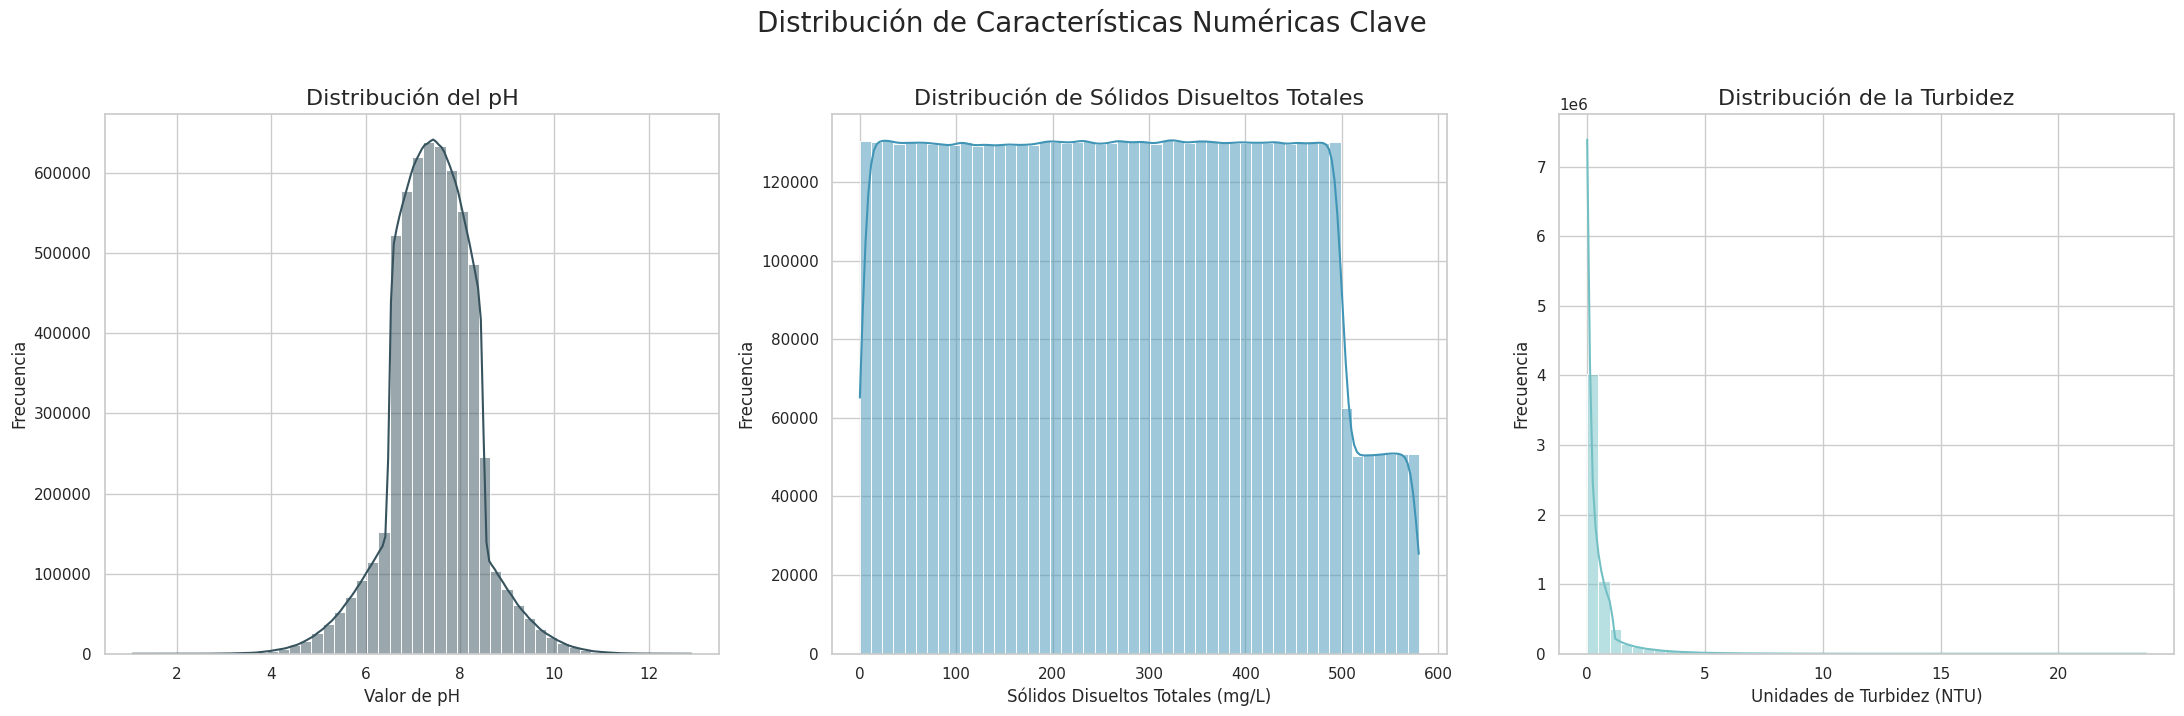

In [ ]:
# --- Visualización de Distribuciones Numéricas ---
# Configuración de estilo y paleta de colores
sns.set_theme(style="whitegrid")
custom_palette = sns.color_palette("GnBu_d") # Usamos una paleta de Verde-Azul oscuro

# Crear una figura con 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(22, 7))
fig.suptitle('Distribución de Características Numéricas Clave', fontsize=20, y=1.02)

# Gráfico para pH
sns.histplot(df['pH'].dropna(), kde=True, ax=axes[0], color=custom_palette[5], bins=50)
axes[0].set_title('Distribución del pH', fontsize=16)
axes[0].set_xlabel('Valor de pH', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)

# Gráfico para Total Dissolved Solids
sns.histplot(df['Total Dissolved Solids'].dropna(), kde=True, ax=axes[1], color=custom_palette[3], bins=50)
axes[1].set_title('Distribución de Sólidos Disueltos Totales', fontsize=16)
axes[1].set_xlabel('Sólidos Disueltos Totales (mg/L)', fontsize=12)
axes[1].set_ylabel('Frecuencia', fontsize=12)

# Gráfico para Turbidity
sns.histplot(df['Turbidity'].dropna(), kde=True, ax=axes[2], color=custom_palette[1], bins=50)
axes[2].set_title('Distribución de la Turbidez', fontsize=16)
axes[2].set_xlabel('Unidades de Turbidez (NTU)', fontsize=12)
axes[2].set_ylabel('Frecuencia', fontsize=12)

plt.tight_layout()
plt.show()

pH: La distribución se asemeja a una distribución normal, centrada alrededor de 7.5. Esto es esperable, ya que el agua tiende a un pH neutro. No se observan sesgos extremos.
Sólidos Disueltos Totales (TDS): La distribución es relativamente uniforme, con un ligero aumento en los valores más altos. Esto indica una amplia variedad en la concentración de sólidos disueltos en las muestras.
Turbidez: Esta variable muestra un fuerte sesgo hacia la derecha. La gran mayoría de las muestras de agua tienen una turbidez muy baja (cercana a 0), lo cual es bueno, pero existen algunos valores atípicos con alta turbidez que podrían ser importantes para el modelo.


Ahora, usemos diagramas de caja (boxplots) para ver si la distribución de estas características cambia para cada clase de Target. Esto es clave para saber si son buenos predictores.

/tmp/ipython-input-2219154596.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y='pH', data=df, ax=axes[0], palette=custom_palette_box)
/tmp/ipython-input-2219154596.py:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(x='Target', y='pH', data=df, ax=axes[0], palette=custom_palette_box)
/tmp/ipython-input-2219154596.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y='Total Dissolved Solids', data=df, ax=axes[1], palette=custom_palette_box)
/tmp/ipython-input-2219154596.py:14: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(x='Target', y='To

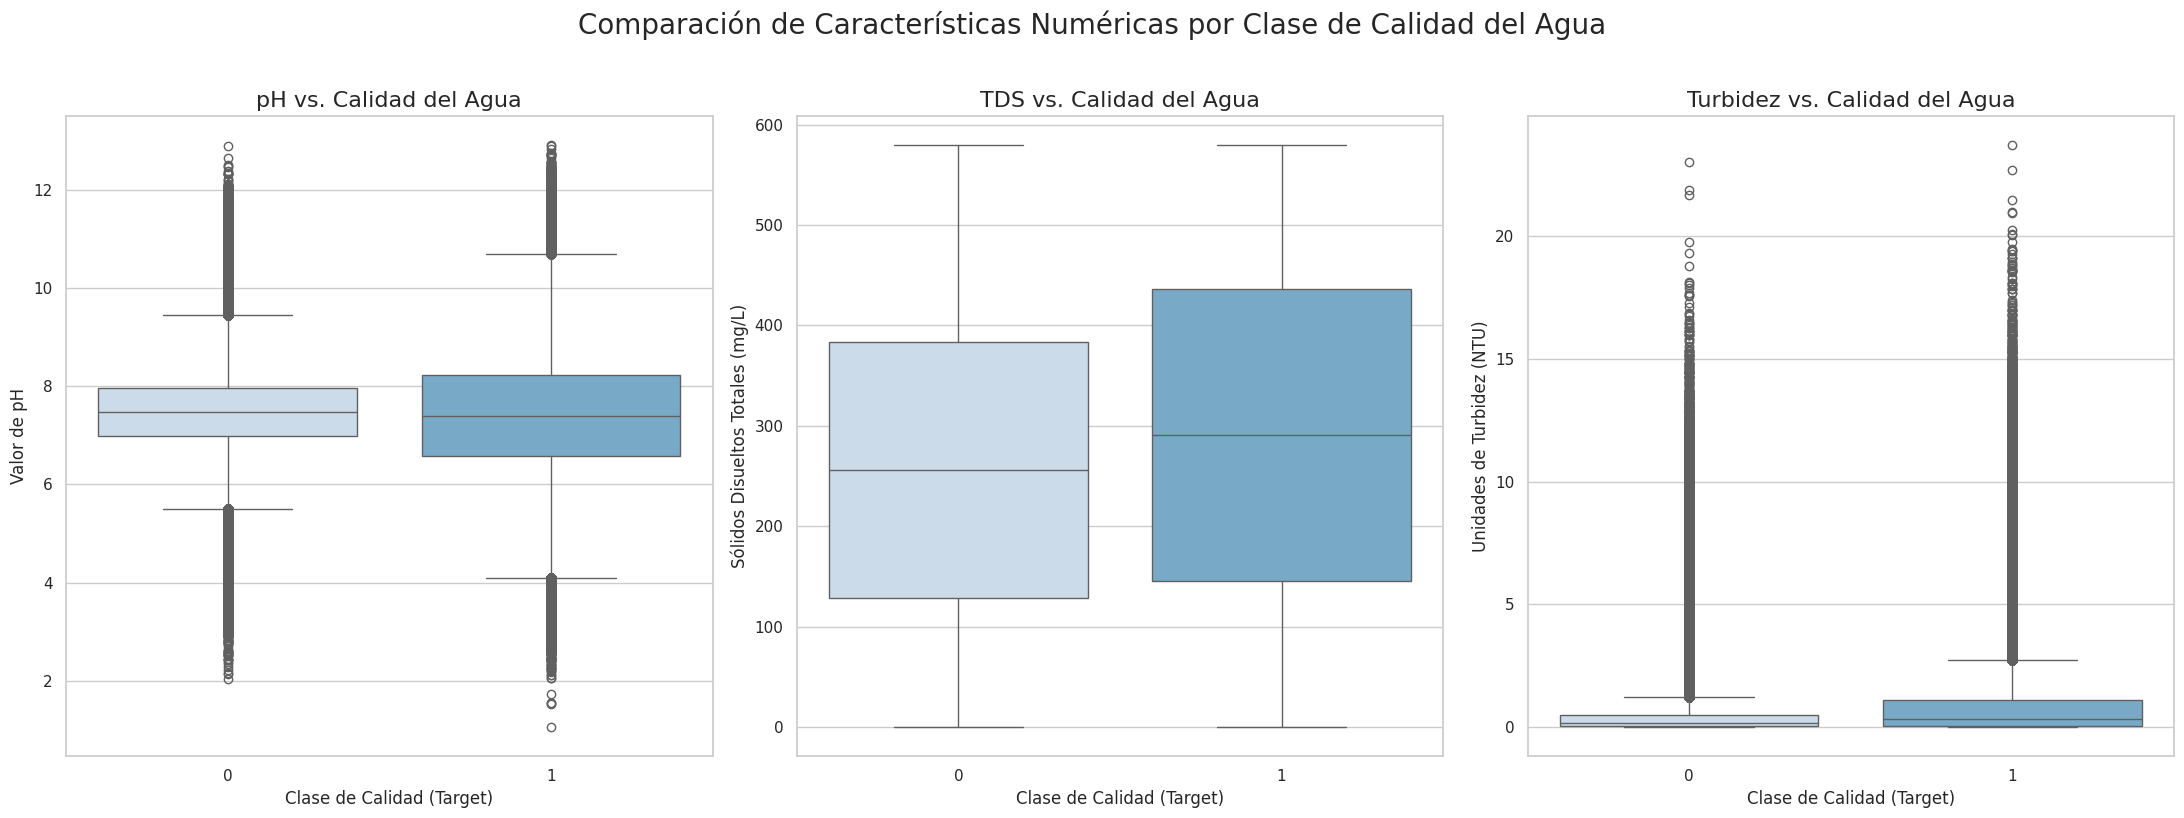

In [ ]:
# --- Boxplots vs. Target ---
# Configuración
fig, axes = plt.subplots(1, 3, figsize=(22, 8))
fig.suptitle('Comparación de Características Numéricas por Clase de Calidad del Agua', fontsize=20, y=1.02)
custom_palette_box = sns.color_palette("Blues", 3)

# Boxplot para pH
sns.boxplot(x='Target', y='pH', data=df, ax=axes[0], palette=custom_palette_box)
axes[0].set_title('pH vs. Calidad del Agua', fontsize=16)
axes[0].set_xlabel('Clase de Calidad (Target)', fontsize=12)
axes[0].set_ylabel('Valor de pH', fontsize=12)

# Boxplot para Total Dissolved Solids
sns.boxplot(x='Target', y='Total Dissolved Solids', data=df, ax=axes[1], palette=custom_palette_box)
axes[1].set_title('TDS vs. Calidad del Agua', fontsize=16)
axes[1].set_xlabel('Clase de Calidad (Target)', fontsize=12)
axes[1].set_ylabel('Sólidos Disueltos Totales (mg/L)', fontsize=12)

# Boxplot para Turbidity
sns.boxplot(x='Target', y='Turbidity', data=df, ax=axes[2], palette=custom_palette_box)
axes[2].set_title('Turbidez vs. Calidad del Agua', fontsize=16)
axes[2].set_xlabel('Clase de Calidad (Target)', fontsize=12)
axes[2].set_ylabel('Unidades de Turbidez (NTU)', fontsize=12)

plt.tight_layout()
plt.show()

* pH vs. Calidad: Se observa una diferencia sutil pero visible. La clase 2 (mejor calidad) parece tener una mediana de pH ligeramente superior y una distribución más compacta en comparación con las otras clases.

* TDS vs. Calidad: La distribución de los Sólidos Disueltos Totales parece ser muy similar en todas las clases. Esto sugiere que el TDS, por sí solo, podría no ser un predictor muy fuerte para diferenciar las clases.

* Turbidez vs. Calidad: Aquí vemos una diferencia más marcada. Las clases 0 y 1 tienen medianas más altas y una mayor cantidad de valores atípicos (outliers) con turbidez elevada en comparación con la clase 2. Una menor turbidez parece estar asociada con una mejor calidad del agua. ¡Esta es una variable prometedora!


### 2.3. Análisis de Correlación

Un mapa de calor nos mostrará la correlación lineal entre todas las variables numéricas. Esto es útil para detectar relaciones fuertes y posible multicolinealidad (variables que están altamente correlacionadas entre sí y que podrían ser redundantes).

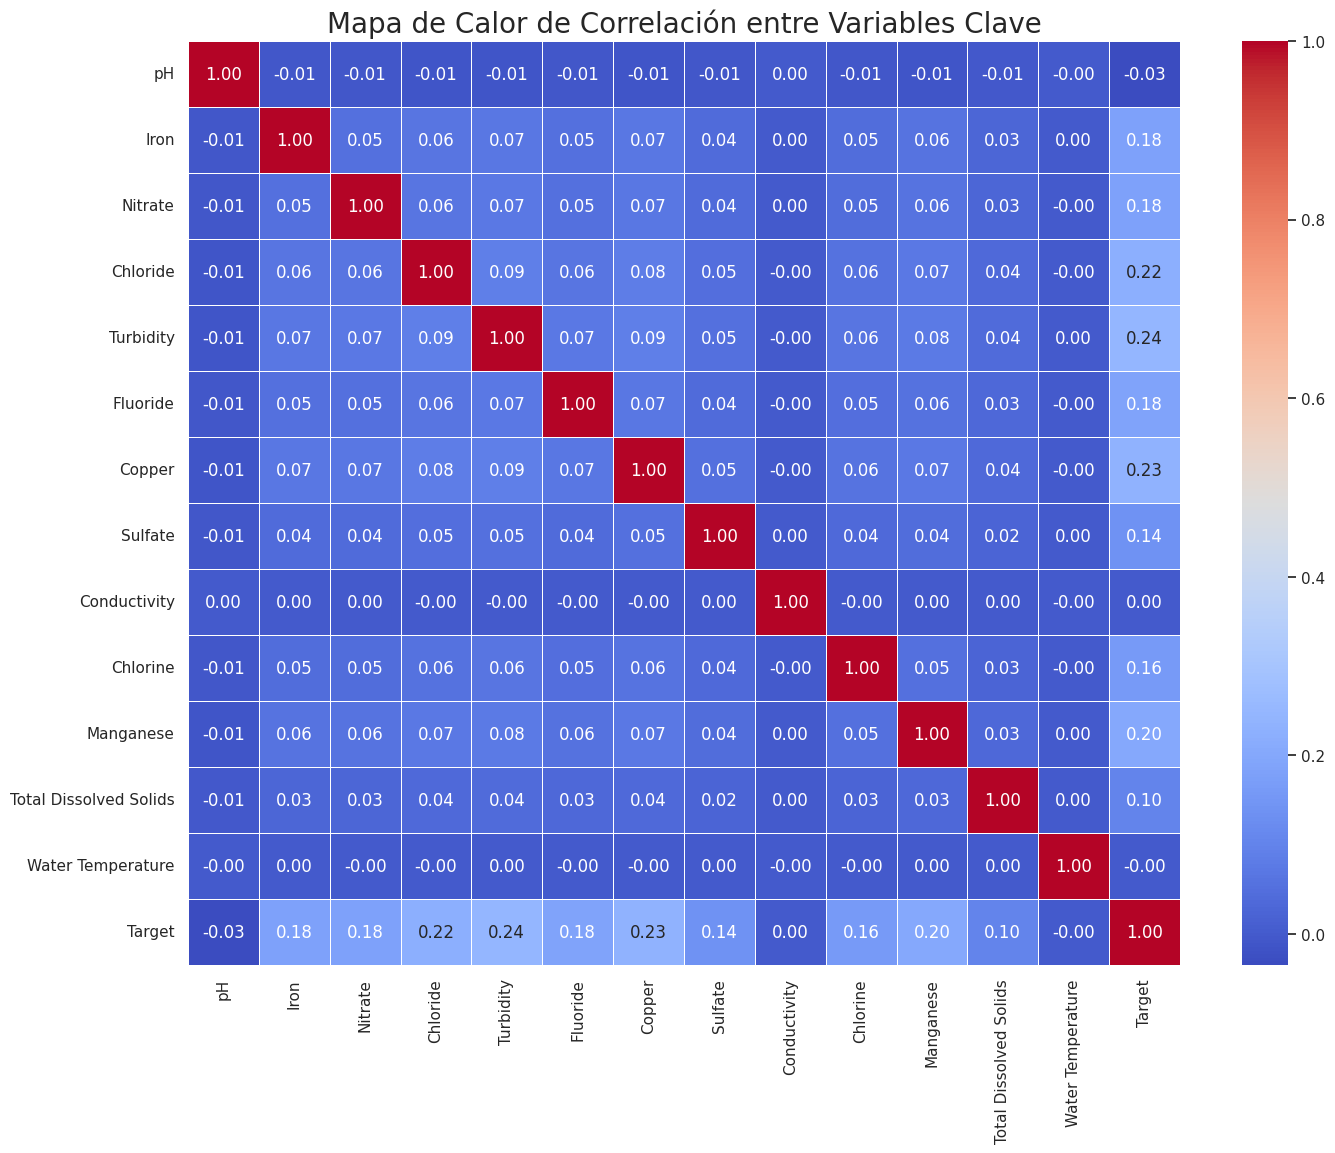

In [ ]:
# --- Mapa de Calor de Correlaciones ---

# Seleccionar un subconjunto de columnas numéricas para un mapa de calor más legible
# Incluimos el 'Target' para ver cómo se correlacionan las características con la variable objetivo
cols_of_interest = [
    'pH', 'Iron', 'Nitrate', 'Chloride', 'Turbidity', 'Fluoride',
    'Copper', 'Sulfate', 'Conductivity', 'Chlorine', 'Manganese',
    'Total Dissolved Solids', 'Water Temperature', 'Target'
]
subset_df = df[cols_of_interest]

# Calcular la matriz de correlación
correlation_matrix = subset_df.corr()

# Crear el mapa de calor
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor de Correlación entre Variables Clave', fontsize=20)
plt.show()

* **Conclusiones del Análisis de Correlación:**
Correlación con Target: Al observar la última fila (Target), notamos que la mayoría de las variables tienen una correlación muy baja (cercana a 0) con la clase de calidad. Las más "altas" (aunque todavía débiles) son pH (positiva) y Turbidity (negativa). Esto confirma lo que vimos en los boxplots. La relación entre las características y la calidad del agua probablemente no es lineal y es más compleja, por lo que un modelo como una red neuronal es una buena elección.

* **Correlaciones entre Características:** Vemos algunas correlaciones moderadas entre las propias características. Por ejemplo, Sulfate y Conductivity tienen una correlación positiva notable. Esto es esperable, ya que más iones de sulfato en el agua aumentarán su conductividad. No parece haber ninguna correlación tan alta que nos obligue a eliminar una variable por multicolinealidad en este momento.

### 2.4. Análisis de Variables Categóricas (Color y Source)

/tmp/ipython-input-1794474355.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(y='Color', data=df, order=df['Color'].value_counts().index, palette=color_palette)


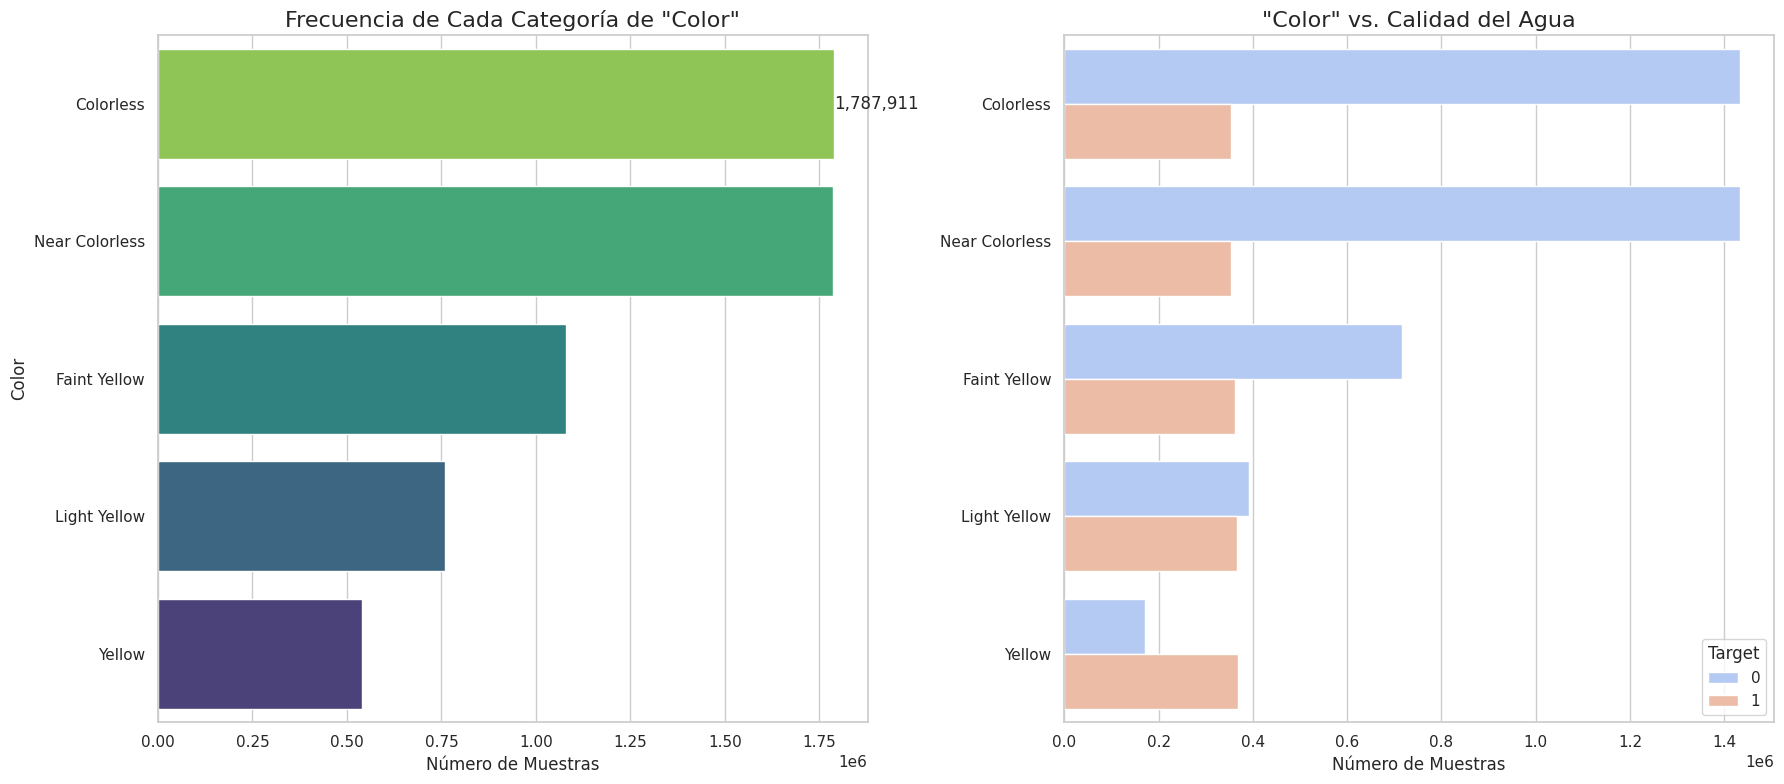


--- Conteo de Valores para la variable 'Source' ---
Source
Stream       734502
Ground       734389
Well         734315
Aquifer      733778
Reservoir    733298
River        732980
Spring       732700
Lake         732618
NaN           88262
Name: count, dtype: int64


In [ ]:
# --- Análisis de la variable 'Color' ---

# Configuración de la figura y la paleta
plt.figure(figsize=(18, 8))
color_palette = sns.color_palette("viridis_r", df['Color'].nunique())

# Gráfico de la distribución de 'Color'
plt.subplot(1, 2, 1)
ax1 = sns.countplot(y='Color', data=df, order=df['Color'].value_counts().index, palette=color_palette)
ax1.set_title('Frecuencia de Cada Categoría de "Color"', fontsize=16)
ax1.set_xlabel('Número de Muestras', fontsize=12)
ax1.set_ylabel('Color', fontsize=12)
ax1.bar_label(ax1.containers[0], fmt='{:,.0f}')

# Gráfico de 'Color' segmentado por 'Target'
plt.subplot(1, 2, 2)
ax2 = sns.countplot(y='Color', data=df, hue='Target', order=df['Color'].value_counts().index, palette='coolwarm')
ax2.set_title('"Color" vs. Calidad del Agua', fontsize=16)
ax2.set_xlabel('Número de Muestras', fontsize=12)
ax2.set_ylabel('') # No es necesario repetir la etiqueta Y

plt.tight_layout()
plt.show()

# --- Análisis de la variable 'Source' ---
print("\n--- Conteo de Valores para la variable 'Source' ---")
print(df['Source'].value_counts(dropna=False))

* **Source (Fuente)**: El conteo de valores confirma nuestra sospecha inicial de la Fase 1. La categoría NaN (nulo) domina abrumadoramente el conjunto de datos. Esta columna no aporta información útil. Decisión clara: Eliminarla en la fase de preprocesamiento.

* **Color:**
  * Observación: Vemos que Colorless (Incoloro), Near Colorless (Casi incoloro) y Faint Yellow (Amarillo pálido) son las categorías más comunes.

  * Relación con Target: El segundo gráfico es muy revelador. La proporción de agua de buena calidad (clase 1) es notablemente mayor en las muestras Colorless. A medida que el agua adquiere color (Light Yellow, Yellow), la proporción de la clase 0 aumenta.

  * Valor para el Modelo: ¡Esta es una variable predictiva importante! La intuición de que el agua más clara es de mejor calidad parece confirmarse en los datos.

  * Estrategia a Futuro: No podemos alimentar un modelo con texto. En la fase de preprocesamiento, tendremos que convertir esta variable categórica en números usando una técnica como One-Hot Encoding.

## 2.5. Análisis de Interacciones y Outliers con Violines

Los diagramas de violín son como los boxplots, pero con superpoderes. Nos muestran la misma información (mediana, cuartiles) pero también la densidad y distribución de los datos, lo que los hace excelentes para detectar outliers y formas bimodales.

/tmp/ipython-input-4185628766.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Target', y=var, data=df, ax=axes[row, col], palette=violin_palette)
/tmp/ipython-input-4185628766.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Target', y=var, data=df, ax=axes[row, col], palette=violin_palette)
/tmp/ipython-input-4185628766.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Target', y=var, data=df, ax=axes[row, col], palette=violin_palette)
/tmp/ipython-input-4185628766.py:14: FutureWarning: 

Passing `palette` with

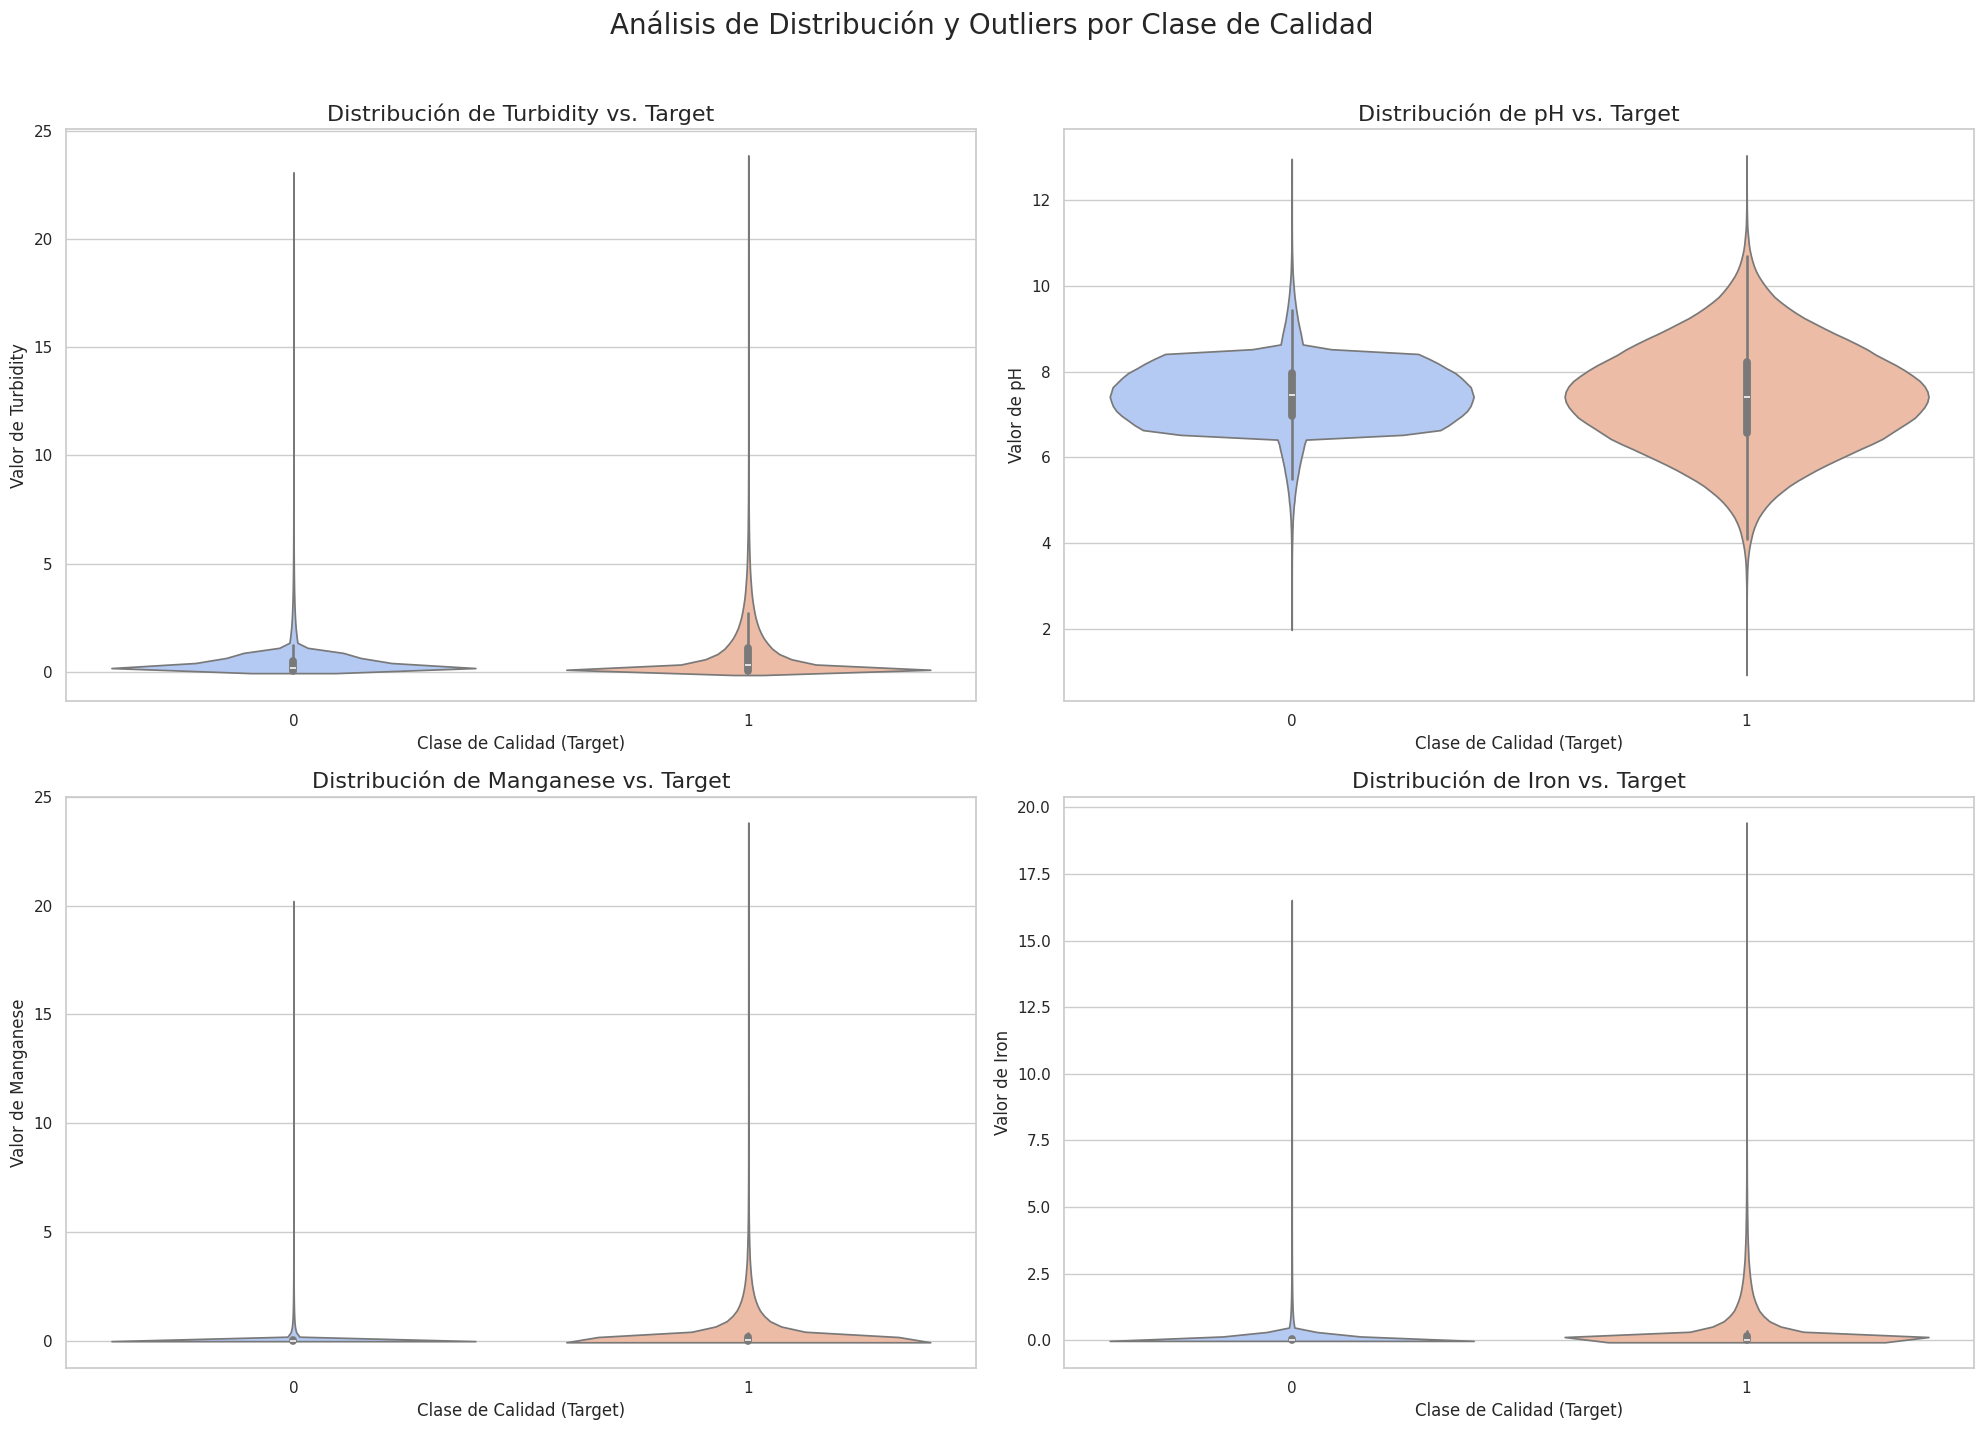

In [ ]:
# --- Gráficos de Violín para variables prometedoras ---

# Seleccionamos variables que mostraron diferencias en los boxplots
vars_to_plot = ['Turbidity', 'pH', 'Manganese', 'Iron']

# Configuración
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle('Análisis de Distribución y Outliers por Clase de Calidad', fontsize=20, y=1.02)
violin_palette = "coolwarm"

# Crear los gráficos de violín
for i, var in enumerate(vars_to_plot):
    row, col = i // 2, i % 2
    sns.violinplot(x='Target', y=var, data=df, ax=axes[row, col], palette=violin_palette)
    axes[row, col].set_title(f'Distribución de {var} vs. Target', fontsize=16)
    axes[row, col].set_xlabel('Clase de Calidad (Target)', fontsize=12)
    axes[row, col].set_ylabel(f'Valor de {var}', fontsize=12)

plt.tight_layout()
plt.show()

* **Observación General:** Estos gráficos confirman y detallan nuestros hallazgos anteriores. La forma del "violín" nos muestra dónde se concentran los datos.

* **Turbidez y Manganeso:** Las distribuciones para estas variables están muy concentradas en valores bajos para ambas clases de calidad. Sin embargo, tienen "colas" muy largas hacia arriba, especialmente para la clase 0. Esto visualiza de forma muy clara el problema de los valores atípicos (outliers) extremos.

* *pH:* La forma de los violines es más parecida a una campana (distribución normal), confirmando lo que vimos en el histograma. La clase 1 parece tener una mediana de pH ligeramente más alta.

* **Posible Complicación para el Modelado:** Los outliers en Turbidity, Manganese y Iron pueden ser un problema. Las redes neuronales pueden ser sensibles a características con escalas muy diferentes. Si un valor es miles de veces más grande que el resto, podría dominar el proceso de aprendizaje.

* **Estrategia a Futuro:** Durante el preprocesamiento, el escalado de datos será fundamental. En lugar de un escalador estándar, podríamos necesitar un RobustScaler, que es menos sensible a los outliers. Otra opción sería aplicar una transformación logarítmica a estas variables sesgadas para comprimir el rango de los valores extremos.

## Fase 3: Tratamiento de datos

## Fase 4: Modelado

## Fase 5: Evaluación